Here we will find some account that we are able to find after the search of the word 'food' in the search column 


In [19]:
#In this block we will import all the need imports that are required to perform the various tasks

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import StaleElementReferenceException

from selenium.webdriver.common.action_chains import ActionChains
# from bs4 import BeautifulSoup
import time
import json

In [20]:
#Here we will make sure to get all the cookies that we ahve stored in the file that we want 
# to import for the for the task to perform

options = webdriver.ChromeOptions()
# options.add_argument("--headless") 
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36")
driver = webdriver.Chrome(options=options)

# Navigate to Medium
driver.get("https://www.instagram.com")

# Load cookies from JSON
with open('cookies_insta_bot.json', 'r') as file:
    all_cookies = json.load(file)

# Clear existing cookies
driver.delete_all_cookies()

# Add cookies
for cookie in all_cookies:
    if '.instagram.com' in cookie.get('domain', ''):
        driver.add_cookie(cookie)

# Refresh page to apply cookies
driver.get("https://instagram.com")
time.sleep(3)

# Check if login was successful
# print(driver.get_cookies())

KeyboardInterrupt: 

In this block of the code we will make a loop of all the famous insta handler name from which we can extract the all the required informations

In [13]:
# List of Instagram handles
first_ten_handles = [
    'foodtalkindia', 'foodconnectindia', 'food_lunatic', 'foodnetwork',
    'food52', 'yourfoodlab', 'insiderfood', 'foodhallindia', 'dilsefoodie', 'foodelhi'
]

# Dictionary to store followers count
list_of_followers = {}

# Iterate over each handle
for handle in first_ten_handles:
    try:
        # Open the search column in Instagram
        search_button = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.XPATH, '/html/body/div[1]/div/div/div[2]/div/div/div[1]/div[1]/div[2]/div/div/div/div/div[2]/div[2]/span/div/a/div/div[2]'))
        )
        if search_button.is_displayed():
            search_button.click()

        # Locate the search box
        search_box = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.XPATH, '/html/body/div[1]/div/div/div[2]/div/div/div[1]/div[1]/div[2]/div/div/div[2]/div/div/div[2]/div/div/div[1]/div/div/input'))
        )

        # Clear the search box and input the handle
        search_box.clear()
        print(f"Searching for Instagram handle: {handle}")
        search_box.send_keys(handle)
        time.sleep(2)

        # Wait for the accounts to load
        all_loaded_insta_accounts = WebDriverWait(driver, 10).until(
            EC.presence_of_all_elements_located(
                (By.CSS_SELECTOR, '.x9f619.xjbqb8w.x78zum5.x168nmei.x13lgxp2.x5pf9jr.xo71vjh.xxbr6pl.xbbxn1n.xwib8y2.x1y1aw1k.x1uhb9sk.x1plvlek.xryxfnj.x1c4vz4f.x2lah0s.xdt5ytf.xqjyukv.x1qjc9v5.x1oa3qoh.x1nhvcw1')
            )
        )

        # Loop through all the search results
        for account in all_loaded_insta_accounts:
            try:
                # Check if the account has a blue tick
                blue_tick = account.find_element(By.CSS_SELECTOR, '.x9f619.xjbqb8w.x1rg5ohu.x168nmei.x13lgxp2.x5pf9jr.xo71vjh.xsgj6o6.x1uhb9sk.x1plvlek.xryxfnj.x1c4vz4f.x2lah0s.xdt5ytf.xqjyukv.x1qjc9v5.x1oa3qoh.x1nhvcw1')

                if blue_tick:
                    account.click()
                    time.sleep(2)

                    # Extract the follower count
                    followers_count_element = WebDriverWait(driver, 10).until(
                        EC.presence_of_element_located(
                            (By.CSS_SELECTOR, 'header section ul li:nth-child(2) span')
                        )
                    )
                    followers_count = followers_count_element.get_attribute("title")#Instagram uses 'title' for large numbers

                    # Add to the dictionary
                    list_of_followers[handle] = followers_count
                    print(f"Added {handle} with {followers_count} followers.")
                    
                    time.sleep(2)

                    Home_button=WebDriverWait(driver, 10).until(
                        EC.presence_of_element_located((By.CSS_SELECTOR, '.x9f619.x3nfvp2.xr9ek0c.xjpr12u.xo237n4.x6pnmvc.x7nr27j.x12dmmrz.xz9dl7a.xn6708d.xsag5q8.x1ye3gou.x80pfx3.x159b3zp.x1dn74xm.xif99yt.x172qv1o.x10djquj.x1lhsz42.xzauu7c.xdoji71.x1dejxi8.x9k3k5o.xs3sg5q.x11hdxyr.x12ldp4w.x1wj20lx.x1lq5wgf.xgqcy7u.x30kzoy.x9jhf4c')
                        ))
                    Home_button.click()
                    
            except NoSuchElementException:
                Home_button=WebDriverWait(driver, 10).until(
                        EC.presence_of_element_located((By.CSS_SELECTOR, '.x9f619.x3nfvp2.x1lq5wgf.xgqcy7u.x30kzoy.x9jhf4c.xr9ek0c.xjpr12u.xo237n4.x6pnmvc.x7nr27j.x12dmmrz.xz9dl7a.xn6708d.xsag5q8.x1ye3gou.x80pfx3.x159b3zp')
                        ))
                Home_button.click()
                print(f"No blue tick found for account: {handle}")
                break
                
            except StaleElementReferenceException:
                print(f"Stale reference while processing {handle}. Retrying...")
                break
    except StaleElementReferenceException:
        print(f"StaleElementReferenceException encountered. Retrying for handle: {handle}.")
        continue
    except Exception as e:
        print(f"Error occurred while processing {handle}: {e}")

# Print the final list of followers
print("Top Instagram handles with followers:")
for handle, followers in list_of_followers.items():
    print(f"{handle}: {followers}")


Searching for Instagram handle: foodtalkindia
Added foodtalkindia with 264,460 followers.
Stale reference while processing foodtalkindia. Retrying...
Searching for Instagram handle: foodconnectindia
Added foodconnectindia with 99,433 followers.
Stale reference while processing foodconnectindia. Retrying...
Searching for Instagram handle: food_lunatic
No blue tick found for account: food_lunatic
StaleElementReferenceException encountered. Retrying for handle: foodnetwork.
Searching for Instagram handle: food52
Added food52 with 3,776,925 followers.
Stale reference while processing food52. Retrying...
Searching for Instagram handle: yourfoodlab
Added yourfoodlab with 3,277,244 followers.
Stale reference while processing yourfoodlab. Retrying...
Searching for Instagram handle: insiderfood
Added insiderfood with 3,398,697 followers.
Stale reference while processing insiderfood. Retrying...
Searching for Instagram handle: foodhallindia
Added foodhallindia with 97,530 followers.
Stale refere

In [14]:
#Finding the top_5 items in the Dictionary
top_5 =dict(sorted(list_of_followers.items(), key=lambda item: int(item[1].replace(',', '')), reverse=True)[:5])

print("Top 5 Insta Users:-")
print('--------------------------------')
p=1
top_users =[]
#Creating a new list that hold the name of them
for i,j in top_5.items():
  top_users.append(i)
  print(f'{p}) {i}: {j}')
  p+=1

Top 5 Insta Users:-
--------------------------------
1) food52: 3,776,925
2) insiderfood: 3,398,697
3) yourfoodlab: 3,277,244
4) dilsefoodie: 1,300,668
5) foodelhi: 301,008


Number of Post done in past 3 Days by all the top 5 Insta Handles

In [36]:
# Dictionary to store the post count
list_of_posts = {}

# Iterate over each handle
for handle in top_5:
    try:
        # Open the search column in Instagram
        search_button = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.XPATH, '/html/body/div[1]/div/div/div[2]/div/div/div[1]/div[1]/div[2]/div/div/div/div/div[2]/div[2]/span/div/a/div/div[2]'))
        )
        if search_button.is_displayed():
            search_button.click()

        # Locate the search box
        search_box = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.XPATH, '/html/body/div[1]/div/div/div[2]/div/div/div[1]/div[1]/div[2]/div/div/div[2]/div/div/div[2]/div/div/div[1]/div/div/input'))
        )

        # Clear the search box and input the handle
        search_box.clear()
        print(f"Searching for Instagram handle: {handle}")
        search_box.send_keys(handle)
        time.sleep(2)
        
        # Wait for the accounts to load
        all_loaded_insta_accounts = WebDriverWait(driver, 10).until(
            EC.presence_of_all_elements_located(
                (By.CSS_SELECTOR, '.x9f619.xjbqb8w.x78zum5.x168nmei.x13lgxp2.x5pf9jr.xo71vjh.xxbr6pl.xbbxn1n.xwib8y2.x1y1aw1k.x1uhb9sk.x1plvlek.xryxfnj.x1c4vz4f.x2lah0s.xdt5ytf.xqjyukv.x1qjc9v5.x1oa3qoh.x1nhvcw1')
            )
        )

        # Loop through all the search results
        for account in all_loaded_insta_accounts:
            count=0
            try:
                # Check if the account has a blue tick
                blue_tick = account.find_element(By.CSS_SELECTOR, '.x9f619.xjbqb8w.x1rg5ohu.x168nmei.x13lgxp2.x5pf9jr.xo71vjh.xsgj6o6.x1uhb9sk.x1plvlek.xryxfnj.x1c4vz4f.x2lah0s.xdt5ytf.xqjyukv.x1qjc9v5.x1oa3qoh.x1nhvcw1')

                if blue_tick:
                    account.click()
                    time.sleep(2)
                    
                    while True:
                        all_posts = driver.find_elements(By.CSS_SELECTOR, '.x1lliihq.x1n2onr6.xh8yej3.x4gyw5p.x1ntc13c.x9i3mqj.x11i5rnm.x2pgyrj')
                        for post in all_posts:
                            try:
                                post.click()
                                time.sleep(1)

                                # Get the 'title' attribute from the post
                                time_data = post.find_element(By.XPATH,"//time[@title]")
                                date=time_data.get_attribute('title')

                                #To check we have title with all the posts
                                if not date:
                                    print("The post element does not contain a 'title' attribute.")
                                    continue
                                else:
                                    print(f"Fetched title: {date}")
                                    
                                #Here we are sticking to the Date instead of using the instagram time.text values 
                                if any(value_date in date for value_date in ['Jan 26, 2025', 'Jan 25, 2025', 'Jan 24, 2025']):
                                    count += 1
                                    print(f"Post from {date} matched the date range.")

                                    # close button working so we can face with error message issue
                                    close_button = WebDriverWait(driver, 10).until(
                                    EC.element_to_be_clickable((By.CSS_SELECTOR, 'body > div.x1n2onr6.xzkaem6 > div.x9f619.x1n2onr6.x1ja2u2z > div > div.x160vmok.x10l6tqk.x1eu8d0j.x1vjfegm > div > div'))
                                    )
                                    close_button.click()

                                else:
                                    print(f"Post from {date} does not match. Ending loop.")

                                    # close button working so we can face with error message issue
                                    close_button = WebDriverWait(driver, 10).until(
                                    EC.element_to_be_clickable((By.CSS_SELECTOR, 'body > div.x1n2onr6.xzkaem6 > div.x9f619.x1n2onr6.x1ja2u2z > div > div.x160vmok.x10l6tqk.x1eu8d0j.x1vjfegm > div > div'))
                                    )
                                    close_button.click()
                                    # using the home button with action Chain to tackle all the interuption errors
                                    home_button = WebDriverWait(driver, 10).until(
                                        EC.presence_of_element_located((By.CSS_SELECTOR, '.x9f619.x3nfvp2.xr9ek0c.xjpr12u.xo237n4.x6pnmvc.x7nr27j.x12dmmrz.xz9dl7a.xn6708d.xsag5q8.x1ye3gou.x80pfx3.x159b3zp.x1dn74xm.xif99yt.x172qv1o.x10djquj.x1lhsz42.xzauu7c.xdoji71.x1dejxi8.x9k3k5o.xs3sg5q.x11hdxyr.x12ldp4w.x1wj20lx.x1lq5wgf.xgqcy7u.x30kzoy.x9jhf4c'))
                                        )
                                    ActionChains(driver).move_to_element(home_button).click().perform()
                                    break

                            except Exception as e:
                                print(f"Error processing post: {e}")
                                continue

                        # Scroll down to load more posts
                        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
                        time.sleep(2)

                        # Check if new posts are loaded
                        new_posts = driver.find_elements(By.CSS_SELECTOR, '.x1lliihq.x1n2onr6.xh8yej3.x4gyw5p.x1ntc13c.x9i3mqj.x11i5rnm.x2pgyrj')
                        if len(new_posts) == len(all_posts):
                            # Break if no new posts are loaded
                            break

                    # Add them all to the Dictionary 
                    list_of_posts[handle] = count
                    print(f'Account name: {handle}, Number of posts: {count}')

                    # Go back to the home page
                    home_button = WebDriverWait(driver, 10).until(
                        EC.presence_of_element_located((By.CSS_SELECTOR, '.x9f619.x3nfvp2.xr9ek0c.xjpr12u.xo237n4.x6pnmvc.x7nr27j.x12dmmrz.xz9dl7a.xn6708d.xsag5q8.x1ye3gou.x80pfx3.x159b3zp.x1dn74xm.xif99yt.x172qv1o.x10djquj.x1lhsz42.xzauu7c.xdoji71.x1dejxi8.x9k3k5o.xs3sg5q.x11hdxyr.x12ldp4w.x1wj20lx.x1lq5wgf.xgqcy7u.x30kzoy.x9jhf4c'))
                    )
                    home_button.click()
                    break

            except NoSuchElementException:
                print(f"No blue tick found for account: {handle}")
                break
            except Exception as e:
                print(f"Error while processing account: {e}")
                break
    except StaleElementReferenceException:
        print(f"StaleElementReferenceException encountered. Retrying for handle: {handle}.")
        continue
    except Exception as e:
        print(f"Error occurred while processing handle: {handle}: {e}")                       

Searching for Instagram handle: food52
Fetched title: Jan 26, 2025
Post from Jan 26, 2025 matched the date range.
Fetched title: Jan 25, 2025
Post from Jan 25, 2025 matched the date range.
Fetched title: Jan 25, 2025
Post from Jan 25, 2025 matched the date range.
Fetched title: Jan 25, 2025
Post from Jan 25, 2025 matched the date range.
Fetched title: Jan 25, 2025
Post from Jan 25, 2025 matched the date range.
Fetched title: Jan 24, 2025
Post from Jan 24, 2025 matched the date range.
Fetched title: Jan 24, 2025
Post from Jan 24, 2025 matched the date range.
Fetched title: Jan 24, 2025
Post from Jan 24, 2025 matched the date range.
Fetched title: Jan 23, 2025
Post from Jan 23, 2025 does not match. Ending loop.
Account name: food52, Number of posts: 8
Searching for Instagram handle: insiderfood
Fetched title: Jan 26, 2025
Post from Jan 26, 2025 matched the date range.
Fetched title: Jan 24, 2025
Post from Jan 24, 2025 matched the date range.
Fetched title: Jan 24, 2025
Post from Jan 24, 

1)food52: 8
2)insiderfood: 4
3)yourfoodlab: 0
4)dilsefoodie: 0
5)foodelhi: 0


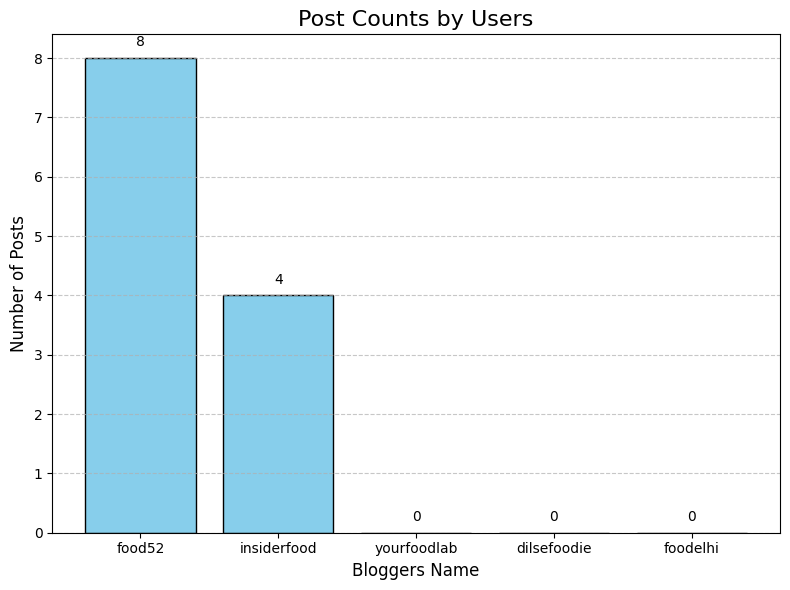

In [ ]:
import matplotlib.pyplot as plt

k=1
for i,j in list_of_posts.items():
  print(f'{k}){i}: {j}')
  k+=1

users = list(list_of_posts.keys())
post_counts = list(list_of_posts.values())

# Plot the bar graph
plt.figure(figsize=(8, 6))
plt.bar(users, post_counts, color='skyblue', edgecolor='black')

# Add titles and labels
plt.title("Post Counts by Users", fontsize=16)
plt.xlabel("Bloggers Name",fontsize=12)
plt.ylabel("Number of Posts", fontsize=12)

# Add value annotations on top of each bar
for i, count in enumerate(post_counts):
    plt.text(i, count+0.2, str(count), ha='center', fontsize=10)

# Show the grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()